In [10]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [11]:
game_data = pd.read_csv('data/test2.csv')

#remove 999usd game
i = game_data[(game_data.AppID == 1200520)].index
game_data.drop(i[0], inplace=True)

game_data.shape

(67137, 29)

In [12]:
game_data['Rate_Ratio'] = game_data['Positive']/ (game_data['Negative'] + game_data['Positive'])
game_data['Reviews'] = game_data['Negative'] + game_data['Positive']

In [13]:
review_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Positive", "Negative", "Rate_Ratio", "Reviews"]])

In [14]:
review_price.head()

,AppID,Name,Price,Positive,Negative,Rate_Ratio,Reviews
0,20200,Galactic Bowling,19.99,6,11,0.352941,17
1,655370,Train Bandit,0.99,53,5,0.913793,58
2,1732930,Jolt Project,4.99,0,0,NaN,0
3,1355720,Henosis™,5.99,3,0,1.000000,3
4,1139950,Two Weeks in Painland,0.00,50,8,0.862069,58


In [15]:
review_price.describe()

,AppID,Price,Positive,Negative,Rate_Ratio,Reviews
count,6.713700e+04,67137.000000,6.713700e+04,67137.000000,56325.000000,6.713700e+04
mean,1.156504e+06,7.389240,1.178792e+03,193.517077,0.744629,1.372309e+03
std,5.805200e+05,10.256432,2.733544e+04,5141.401350,0.243325,3.153793e+04
min,1.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,6.776100e+05,0.990000,2.000000e+00,0.000000,0.622517,2.000000e+00
50%,1.131160e+06,4.990000,1.100000e+01,3.000000,0.801249,1.500000e+01
75%,1.622840e+06,9.990000,6.600000e+01,20.000000,0.935484,9.100000e+01
max,2.325190e+06,299.900000,5.764420e+06,895978.000000,1.000000,6.531097e+06


In [16]:
review_price.to_csv("reviews.csv", sep=',', encoding='utf-8')

In [17]:
review_price.dropna(axis=0, subset=["Rate_Ratio"], inplace=True)
review_price = review_price[review_price['Reviews'] > 10]

review_price.describe()

,AppID,Price,Positive,Negative,Rate_Ratio,Reviews
count,3.765600e+04,37656.000000,3.765600e+04,37656.000000,37656.000000,3.765600e+04
mean,9.000239e+05,8.661539,2.100089e+03,344.411727,0.758875,2.444501e+03
std,5.007637e+05,10.255877,3.647348e+04,6861.338764,0.184687,4.208029e+04
min,1.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,1.100000e+01
25%,4.892350e+05,1.990000,1.800000e+01,5.000000,0.653846,2.500000e+01
50%,8.309150e+05,4.990000,5.000000e+01,15.000000,0.800000,6.900000e+01
75%,1.267862e+06,11.990000,2.440000e+02,64.000000,0.904762,3.190000e+02
max,2.311760e+06,299.900000,5.764420e+06,895978.000000,1.000000,6.531097e+06


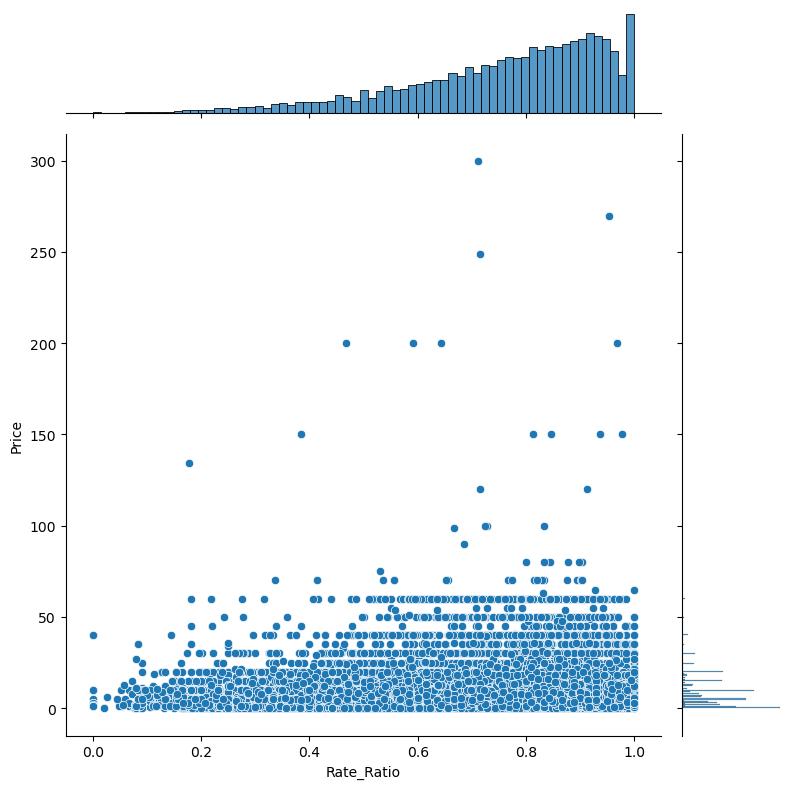

In [18]:
sb.jointplot(data = review_price, x = "Rate_Ratio", y = "Price", height = 8)